# Importing the Libraries

In [3]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the dataset

In [4]:
# Importing the dataset by using pandas

dataset = pd.read_csv("train_tweets.csv")
dataset.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
dataset.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [7]:
dataset['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

# Cleaning the data

In [8]:
def drop_features(features,data):
    data.drop(features,inplace=True,axis=1)

In [9]:
import re
re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])"," ","ouch...junior is angryð#got7 #junior #yugyo..., @user")

'ouch   junior is angry     got7  junior  yugyo      '

In [10]:
def process_tweet(tweet):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])","",tweet.lower()).split())

In [11]:
dataset['processed_tweets'] = dataset['tweet'].apply(process_tweet)

In [12]:
dataset.head()

,id,label,tweet,processed_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cant use cause they d...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train , y_test = train_test_split(dataset["processed_tweets"], dataset["label"],test_size = 0.2, random_state=42)

In [49]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [50]:
count_vect = CountVectorizer(stop_words = 'english')
transformer = TfidfTransformer()

In [51]:
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

In [52]:
print(x_train_counts.shape)
print(x_train_tfidf.shape)

(25569, 35626)
(25569, 35626)


In [53]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

In [54]:
print(x_test_counts.shape)
print(x_test_tfidf.shape)

(6393, 35626)
(6393, 35626)


# Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train_tfidf, y_train)

C:\Users\Inet computer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [56]:
predLR = model1.predict(x_test_tfidf)

In [57]:
from sklearn.metrics import confusion_matrix,f1_score
c_m = confusion_matrix(y_test,predLR)
print(c_m)

[[5925   12]
 [ 324  132]]


In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predLR)

0.9474425152510558

# Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(x_train_tfidf,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [60]:
predDT = model2.predict(x_test_tfidf)

In [61]:
c_m = confusion_matrix(y_test,predDT)
print(c_m)

[[5770  167]
 [ 162  294]]


In [62]:
accuracy_score(y_test,predDT)

0.9485374628499922

# Support Vector Machines

In [63]:
from sklearn.svm import SVC
model3 = SVC()
model3.fit(x_train_tfidf,y_train)

C:\Users\Inet computer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [64]:
predSVC = model3.predict(x_test_tfidf)

In [65]:
c_m = confusion_matrix(y_test,predSVC)
print(c_m)

[[5937    0]
 [ 456    0]]


In [66]:
accuracy_score(y_test,predSVC)

0.9286719849835758

# Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators=200)
model4.fit(x_train_tfidf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
predRF = model4.predict(x_test_tfidf)

In [69]:
c_m = confusion_matrix(y_test,predRF)
print(c_m)

[[5905   32]
 [ 219  237]]


In [70]:
accuracy_score(y_test,predRF)

0.9607383075238543

In [71]:
tp,fn,fp,tn = c_m[0][0],c_m[0][1],c_m[1][0],c_m[1][1]
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1score = 2*(recall*precision)/(recall+precision)

print("precision = ", precision)
print("recall = ", recall)
print("f1score = ", f1score)

precision =  0.9642390594382756
recall =  0.9946100724271517
f1score =  0.979189121963353


Text(0.5, 1.0, 'Models vs Accuracy')

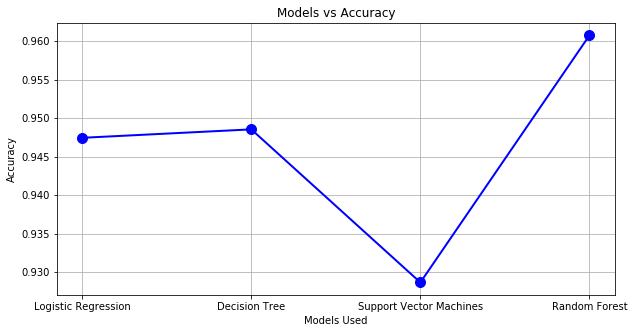

In [72]:
mod_accuracy = [accuracy_score(y_test,predLR),accuracy_score(y_test,predDT),accuracy_score(y_test,predSVC),accuracy_score(y_test,predRF)]
models = ["Logistic Regression", "Decision Tree", "Support Vector Machines", "Random Forest"]
plt.figure(figsize=(10,5))
plt.plot(models,mod_accuracy,'bo',linestyle = 'solid', linewidth = 2, markersize = 10)
plt.grid()
plt.xlabel("Models Used")
plt.ylabel("Accuracy")
plt.title("Models vs Accuracy")
